In [3]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**Data A of Weights**

In [4]:
data = np.genfromtxt('../Data/data_banknote_authentication.txt', delimiter = ',')
X = data[:,:4]
y = data[:, 4]

**Data B of Bank**

In [5]:
pand = pd.read_csv('../Data/weights.csv', sep=',')
b = [value for value in pand['headc']]
values = [[value for value in row] for row in pand.values]
a = [[values[i][j] for j in range(len(values[i])) if j!=0 and j!=3] for i in range(len(values))]
b = np.asanyarray(b)
a = np.asanyarray(a)

<h2>Presentation of data</h2>

**Data A**

Text(0, 0.5, 'skewness of wavelet')

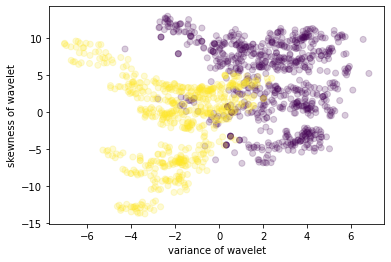

In [6]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.2,c=y, cmap='viridis')
plt.xlabel('variance of wavelet')
plt.ylabel('skewness of wavelet')

**Data B**

Text(0, 0.5, 'headc')

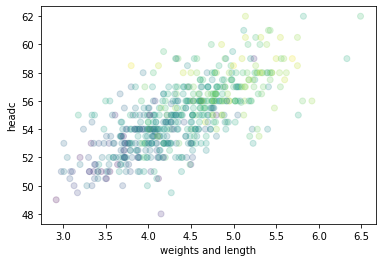

In [7]:
plt.scatter(a[:, 0], a[:, 1], alpha=0.2,c=b, cmap='viridis')
plt.xlabel('weights and length')
plt.ylabel('headc')

<h2>Spliting data into Train and Test</h2>

**Data A**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.T
y_train = y_train.reshape(1, y_train.shape[0])
X_test = X_test.T
y_test = y_test.reshape(1, y_test.shape[0])

print ('There are m = %d training for this Data!' % (X_train.shape[1]))
print ('Train X Shape: ', X_train.shape)
print ('Train Y Shape: ', y_train.shape)
print ('\nTest X Shape: ', X_test.shape)

There are m = 1097 training for this Data!
Train X Shape:  (4, 1097)
Train Y Shape:  (1, 1097)

Test X Shape:  (4, 275)


**Data B**

In [9]:
A_train, A_test, B_train, B_test = train_test_split(a, b, test_size=0.2, random_state=42)
A_train = A_train.T
B_train = B_train.reshape(1, B_train.shape[0])
A_test = A_test.T
B_test = B_test.reshape(1, B_test.shape[0])

print ('There are m = %d training for this Data!' % (A_train.shape[1]))
print ('Train X Shape: ', A_train.shape)
print ('Train Y Shape: ', B_train.shape)
print ('\nTest X Shape: ', A_test.shape)

There are m = 440 training for this Data!
Train X Shape:  (2, 440)
Train Y Shape:  (1, 440)

Test X Shape:  (2, 110)


<h2>Neural Network building</h2>

We would follow below stratergy for our Neural designed model so far

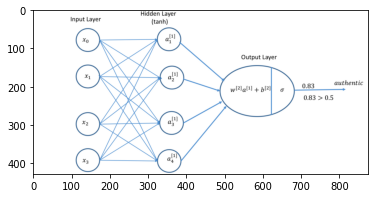

In [10]:
import cv2
img = cv2.imread('../Data/NeuralNetwork_Python.png')		
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_img)
plt.show()

<h2>Define structure of Perceptron and parameter of it</h2>

We need to define the number of input units, the number of hidden units, and the output layer. The input units are equal to the number of features in the dataset (4), hidden layer is set to 4 (for this purpose), and the problem is the binary classification we will use a single layer output.
<br><br>
We need to initialize the weight matrices and bias vectors. Weight is initialized randomly while bias is set to zeros. This can be done using the following function.

In [11]:
def define_structure(X, Y, numberHidenLayer=1):
    hiden_layers =  list()
    input_unit = X.shape[0] # size of input layer
    for _ in range(numberHidenLayer): 
        hiden_layers.append(len(X)) #hidden layer size
    output_unit = Y.shape[0] # size of output layer
    return (input_unit, hiden_layers, output_unit)

def parameters_initialization(input_unit, hiden_layers, output_unit):
    np.random.seed(2)
    para = dict()
    for i in range(len(hiden_layers)+1):
        keyWeight = "W"+str(i+1)
        keyBias = "b"+str(i+1)
        if(i==0):
            para[keyWeight] = np.random.randn(hiden_layers[i], input_unit)*0.01
            para[keyBias] = np.zeros((hiden_layers[i], 1))
        elif (i==len(hiden_layers)):
            para[keyWeight] = np.random.randn(output_unit, hiden_layers[i-1])*0.01
            para[keyBias] = np.zeros((output_unit, 1))
        else:
            para[keyWeight] = np.random.randn(hiden_layers[i], hiden_layers[i-1])*0.01
            para[keyBias] = np.zeros((hiden_layers[i], 1))
    return para

**Data A**

In [12]:
print(X)
print("-----------------------")
(input_unit, hiden_layers, output_unit) = define_structure(X_train, y_train)
print("The size of the input layer is:  = " + str(input_unit))
print("The size of the hidden layer is:  = " + str(hiden_layers))
print("The size of the output layer is:  = " + str(output_unit))

hiden_layersA = hiden_layers
paraA = parameters_initialization(input_unit, hiden_layers, output_unit)

[[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]
-----------------------
The size of the input layer is:  = 4
The size of the hidden layer is:  = [4]
The size of the output layer is:  = 1


**Data  B**

In [13]:
print(a)
print("-----------------------")
(input_unit, hiden_layers, output_unit) = define_structure(A_train, B_train)
print("The size of the input layer is:  = " + str(input_unit))
print("The size of the hidden layer is:  = " + str(hiden_layers))
print("The size of the output layer is:  = " + str(output_unit))

hiden_layersB = hiden_layers
paraB = parameters_initialization(input_unit, hiden_layers, output_unit)

[[ 3.95 55.5 ]
 [ 4.63 57.  ]
 [ 4.75 56.  ]
 ...
 [ 3.88 52.  ]
 [ 5.23 57.5 ]
 [ 4.57 53.5 ]]
-----------------------
The size of the input layer is:  = 2
The size of the hidden layer is:  = [2]
The size of the output layer is:  = 1


<h2>Forward Propagation</h2>

For forward propagation, given the set of input features (X), we need to compute the activation function for each layer. For the hidden layer, we are using tanh activation function: <br>

$$
{Z}^{[j][i]} = {W}^{[j]} {x}^{[i]} + {b}^{[j]}
$$

$$
{a}^{[j][i]} = tanh({Z}^{[1][i]})
$$

with **j** is all layers from  input to hidden layers, if **j** is the last layer (output layer) we use Sigmoid activation function instead: <br>

$$
{Z}^{[j][i]} = {W}^{[j]} {x}^{[i]} + {b}^{[j]}
$$

$$
{y}^{i} = {a}^{[j][i]} = Sigmoid({z}^{[j][i]})
$$


In [14]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def forward_propagation(X, parameters):
    i = 0
    cache = dict()
    while True:
        keyWeight = "W" + str(i+1)
        keyBias = "b" + str(i+1)
        keyA = "A" + str(i+1)
        keyZ = "Z" + str(i+1)
        try: 
            W = parameters[keyWeight]
            bias = parameters[keyBias]
        except: return cache["A"+str(i)], cache
        if (i==0):
            Z = np.dot(W, X) + bias
            A = np.tanh(Z)
        elif (i==(len(parameters)/2)-1):
            Z = np.dot(W, cache["A"+str(i)]) + bias
            A = sigmoid(Z)
        else:
            Z = np.dot(W, cache["A"+str(i)]) + bias
            A = np.tanh(Z)
        cache[keyZ] = Z
        cache[keyA] = A
        if (i==(len(parameters)/2)-1): return cache[keyA], cache
        i+=1

<h2>Compute Cost</h2>

We will compute the cross-entropy cost. In the above section, we calculated A2. Using A2 we can compute cross-entropy cost using the following formula: <br>

$$
J = -\frac{1}{m} \sum \limits_{i=1}^{m} ({y}^{(i)}log({a}^{[j][i]}) + (1 - {y}^{(i)})log(1 - {a}^{[j][i]}))
$$
(with **j** is the last layer of neural)

In [15]:
def cross_entropy_cost(A, Y, parameters):
    m = Y.shape[1] 
    logprobs = np.multiply(np.log(A), Y) + np.multiply((1-Y), np.log(1 - A))
    cost = - np.sum(logprobs) / m
    cost = float(np.squeeze(cost))
                                    
    return cost

<h2>Back Propagation</h2>

We need to calculate the gradient with respect to different parameters as shown below:

$${dz}^{[j]} = {A}^{[j]}-Y$$
$$dW = \frac{1}{m}{dZ}^{[j]} {A}^{{[j]}^{T}}$$
$${db}^{[j]} = \frac{1}{m} sum({dZ}^{[j]}, axis=1, keepdims=True)$$
$${dZ}^{[j-1]} = {W}^{{[j]}^{T}} {dZ}^{[j]} * {g}^{[j-1]'}({Z}^{[j-1]})$$
$${dW}^{[j-1]} = \frac{1}{m} {dZ}^{[j-1]} {X}^{T}$$
$${db}^{[j-1]} = \frac{1}{m} sum({dZ}^{[j-1]}, axis=1, keepdims=True)$$


In [16]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    prads = dict()
    listDZ = list()
    j = int(len(parameters)/2)
    while j>0:
        keyWeight = "W"+str(j)
        keyA = "A"+str(j)
        if (j==len(parameters)/2):
            dZ = cache[keyA] - Y
            listDZ.append(dZ)
        else:
            last_W = parameters["W"+str(j+1)]
            last_dZ = listDZ.pop(0)
            dZ = np.multiply(np.dot(last_W.T, last_dZ), 1-np.power(cache[keyA], 2))
            listDZ.append(dZ)
        if (j==1):
            dW = (1/m) * np.dot(dZ, X.T)
        else:
            A_before = cache["A"+str(j-1)]
            dW = (1/m) * np.dot(dZ, A_before.T)
        db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
        prads["dW"+str(j)] =  dW
        prads["db"+str(j)] = db
        j-=1
    return prads

<h2>Gradient Descent</h2>

We need to update the parameters using the gradient descent rule:

$$
\theta = \theta - \alpha\frac{\delta j}{\delta \theta}
$$


where 𝛼 is the learning rate and 𝜃 is the parameter.

In [17]:
def gradient_descent(parameters, grads, learning_rate):
    for i in range(int(len(parameters)/2)):
        parameters['W'+str(i+1)] -= learning_rate*grads['dW'+str(i+1)]
        parameters['b'+str(i+1)] -= learning_rate*grads['db'+str(i+1)]
    return parameters

<h2>Neural Network - Machine Learning</h2>

Finally, putting together all the functions we can build a neural network model with a single hidden layer

In [18]:
def neural_network_model(X, Y, hiden_layers, learning_rate = 0.01, num_iterations = 1000):
    np.random.seed(3)
    input_unit = define_structure(X, Y)[0]
    output_unit = define_structure(X, Y)[2]
    
    parameters = parameters_initialization(input_unit, hiden_layers, output_unit)
    
    for i in range(0, num_iterations):
        A, cache = forward_propagation(X, parameters)
        cost = cross_entropy_cost(A, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = gradient_descent(parameters, grads, learning_rate)
        if i % 100 == 0:
           print ("Cost after iteration %i: %f" %(i, cost))
    return parameters

**Data A**

In [19]:
paraA = neural_network_model(X_train, y_train, hiden_layersA)

Cost after iteration 0: 0.692975
Cost after iteration 100: 0.679420
Cost after iteration 200: 0.616305
Cost after iteration 300: 0.490163
Cost after iteration 400: 0.362561
Cost after iteration 500: 0.273820
Cost after iteration 600: 0.216127
Cost after iteration 700: 0.177183
Cost after iteration 800: 0.149534
Cost after iteration 900: 0.129041


**Data B**

In [20]:
paraB = neural_network_model(A_train, B_train, hiden_layersB, 0.00000025)

Cost after iteration 0: 0.870560
Cost after iteration 100: 0.783726
Cost after iteration 200: 0.697464
Cost after iteration 300: 0.611741
Cost after iteration 400: 0.526521
Cost after iteration 500: 0.441767
Cost after iteration 600: 0.357437
Cost after iteration 700: 0.273488
Cost after iteration 800: 0.189874
Cost after iteration 900: 0.106549


<h2>Prediction</h2>

Using the learned parameter, we can predict the class for each example by using forward propagation. <br>
If the activation > 0.5, then prediction is 1 otherwise 0.

In [21]:
def prediction(parameters, X):
    A, cache = forward_propagation(X, parameters)
    predictions = np.round(A)
    return predictions

def getPortion(data, predict):
    return float((np.dot(data, predict.T) + np.dot(1 - data, 1 - predict.T))/float(data.size)*100)

def getPrediction(parameter, trainA, trainB, testA, testB):
    predictions = prediction(parameter, trainA)
    portion = getPortion(trainB, predictions)
    print (f'Accuracy Train: {round(portion)}%')
    predictions = prediction(parameter, testA)
    portion = getPortion(testB, predictions)
    print (f'Accuracy Test: {round(portion)}%')

**Data A**

In [22]:
getPrediction(paraA, X_train, y_train, X_test, y_test)

Accuracy Train: 98%
Accuracy Test: 96%


**Data B**

In [23]:
getPrediction(paraB, A_train, B_train, A_test, B_test)

Accuracy Train: 3795%
Accuracy Test: 3770%
